In [1]:
# mencari directory saat ini
import os
os.getcwd()

'C:\\Users\\KOMPUTER\\Documents\\Jupyter Notebooks'

In [2]:
# Merubah directory
os.chdir('D:\\ITS\\Tugas Akhir\\Source Code')
# Merubah directory (beneran)
os.chdir('D:/ITS/Tugas Akhir/Source Code')

In [3]:
import numpy as np
import pandas as pd
import glob 

In [4]:
cur_path = "D:/ITS/Tugas Akhir/data/Endaq CSV/"

In [5]:
normal_file_names = glob.glob(cur_path+'/normal/*.csv')
imnormal_misalignment = glob.glob(cur_path+'/misalignment/*.csv')
imnormal_unbalance = glob.glob(cur_path+'/unbalance/*.csv')
imnormal_bearing = glob.glob(cur_path+'/bearing/*.csv')

In [6]:
def dataReader(path_names):
    data_n = pd.DataFrame()
    for i in path_names:
        low_data = pd.read_csv(i,header=None)
        data_n = pd.concat([data_n,low_data],ignore_index=True)
    return data_n

In [7]:
data_normal = dataReader(normal_file_names)
data_misalignment = dataReader(imnormal_misalignment)
data_unbalance = dataReader(imnormal_unbalance)
data_bearing = dataReader(imnormal_bearing)

In [8]:
# DOWN SAMPLING

def downSampler(data,a,b):
    """
    data = data
    a = start index
    b = sampling rate
    """
    data_decreased = pd.DataFrame()
    x = b
    for i in range(int(len(data)/x)):
        data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
        a += x
        b += x
    return data_decreased

In [9]:
data_normal = downSampler(data_normal, 0, 5000)
data_misalignment = downSampler(data_misalignment, 0, 5000)
data_unbalance = downSampler(data_unbalance, 0, 5000)
data_bearing = downSampler(data_bearing, 0, 5000)

In [10]:
data_misalignment

,0,1,2,3
0,0.130474,0.012886,0.009876,-0.010109
1,0.380527,0.026833,0.028392,-0.016349
2,0.630527,-0.007332,-0.015320,-0.013292
3,0.880534,0.015834,0.023270,-0.004290
4,1.130533,-0.000268,0.000020,-0.005971
...,...,...,...,...
993,3.663596,0.005334,0.009432,-0.003525
994,3.913604,-0.006480,-0.014145,0.000059
995,4.163604,0.025339,0.029569,0.000994
996,4.413611,-0.007813,-0.020164,-0.000312


In [11]:
len(data_misalignment)

998

In [12]:
# Menghapus kolom 0 (time)
data_normal.drop(data_normal.columns[[0]], axis=1, inplace=True)
data_misalignment.drop(data_misalignment.columns[[0]], axis=1, inplace=True)
data_unbalance.drop(data_unbalance.columns[[0]], axis=1, inplace=True)
data_bearing.drop(data_bearing.columns[[0]], axis=1, inplace=True)

In [13]:
data_normal

,1,2,3
0,0.013848,0.018814,-0.015172
1,0.008430,0.011405,-0.009147
2,0.012435,0.012002,-0.014494
3,0.003324,0.009756,-0.003176
4,0.006343,0.006950,-0.007484
...,...,...,...
2009,0.004319,0.003327,0.003765
2010,0.009341,0.005612,-0.005087
2011,0.002934,0.003050,-0.002779
2012,0.002245,0.005527,-0.003519


In [14]:
# FFT

from scipy import signal
def FFT(data):
    autocorr = signal.fftconvolve(data,data[::-1],mode='full')
    return pd.DataFrame(autocorr)

In [15]:
data_normal = FFT(data_normal)
data_misalignment = FFT(data_misalignment)
data_unbalance = FFT(data_unbalance)
data_bearing = FFT(data_bearing)

In [16]:
y_1 = pd.DataFrame(np.full((int(len(data_normal)),1),0))
y_2 = pd.DataFrame(np.full((int(len(data_misalignment)),1),1))
y_3 = pd.DataFrame(np.full((int(len(data_unbalance)),1),2))
y_4 = pd.DataFrame(np.full((int(len(data_bearing)),1),3))
y = pd.concat([y_1,y_2,y_3,y_4], ignore_index=False)
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
2030,3
2031,3
2032,3
2033,3


In [17]:
data_normal

,0,1,2,3,4
0,0.000099,0.000173,-0.000054,-0.000041,-0.000001
1,0.000091,0.000224,-0.000011,-0.000175,0.000053
2,0.000148,0.000290,-0.000081,-0.000229,0.000073
3,0.000206,0.000487,-0.000127,-0.000371,0.000153
4,0.000228,0.000462,-0.000054,-0.000239,0.000040
...,...,...,...,...,...
4022,0.000228,0.000462,-0.000054,-0.000239,0.000040
4023,0.000206,0.000487,-0.000127,-0.000371,0.000153
4024,0.000148,0.000290,-0.000081,-0.000229,0.000073
4025,0.000091,0.000224,-0.000011,-0.000175,0.000053


In [18]:
data = pd.concat([data_normal,data_misalignment,data_unbalance,data_bearing],ignore_index=True)

In [19]:
data

,0,1,2,3,4
0,0.000099,0.000173,-0.000054,-4.094008e-05,-0.000001
1,0.000091,0.000224,-0.000011,-1.747493e-04,0.000053
2,0.000148,0.000290,-0.000081,-2.288879e-04,0.000073
3,0.000206,0.000487,-0.000127,-3.708794e-04,0.000153
4,0.000228,0.000462,-0.000054,-2.388535e-04,0.000040
...,...,...,...,...,...
12153,0.002694,0.002368,-0.002046,5.075879e-07,-0.000039
12154,0.002596,0.002350,-0.001052,1.433499e-04,-0.000063
12155,0.000036,-0.000085,0.000163,2.534752e-04,-0.000143
12156,-0.000368,-0.000466,0.000337,2.986973e-04,-0.000143


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, shuffle=True)

In [21]:
print("Shape of Train Data : {}".format(X_train.shape))
print("Shape of Test Data : {}".format(X_test.shape))

Shape of Train Data : (9726, 5)
Shape of Test Data : (2432, 5)


In [22]:
## kNN Machine Learning

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) #n_neighbors = k
outknn = knn.fit(X_train,y_train)
print("k={}NN Accuracy on Train Data: {}".format(3,knn.score(X_train,y_train)))
print("k={}NN Accuracy on Test Data: {}".format(3,knn.score(X_test,y_test)))

C:\Users\KOMPUTER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k=3NN Accuracy on Train Data: 0.9788196586469258
k=3NN Accuracy on Test Data: 0.884046052631579


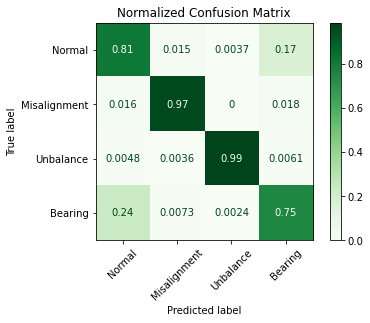

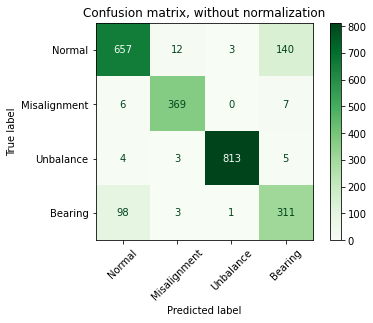

In [23]:
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix

# Generate confusion matrix (normalization)
class_names = ['Normal', 'Misalignment', 'Unbalance', 'Bearing']
matrix_1 = plot_confusion_matrix(outknn, X_test, y_test, display_labels=class_names, xticks_rotation=45,
                                 cmap=plt.cm.Greens,
                                 normalize='true')
plt.title('Normalized Confusion Matrix')
plt.show(matrix_1)

matrix_2 = plot_confusion_matrix(outknn, X_test, y_test, display_labels=class_names, xticks_rotation=45,
                                 cmap=plt.cm.Greens,
                                 normalize=None)
plt.title('Confusion matrix, without normalization')
plt.show(matrix_2)

plt.show()

In [24]:
from sklearn.metrics import roc_auc_score

preds = outknn.predict(X_test) # label scores 
y_predict = np.argmax(preds, axis=0) # predicted classes 
y_true  = np.argmax(y_test, axis=1) # true classes

#y_predict=clf.predict(X_test)
#y_true = np.argmax(y_test, axis=0)

roc_auc = roc_auc_score(y_true=y_test, y_score=y_predict, average='macro', sample_weight=None, max_fpr=None, multi_class='ovo', labels=None)
#roc_auc = roc_auc_score(y_test, y_predict, multi_class='ovr')
roc_auc

TypeError: Singleton array array(1, dtype=int64) cannot be considered a valid collection.

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
fpr, tpr, thresholds = roc_curve(y_test, decision.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='Decision Tree (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# save the model to disk
filename = 'finalized_model.sav'

pickle.dump(clf, open(filename, 'wb'))

#load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
result